In [98]:
import pandas as pd
import datetime as dt
import scipy.optimize
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [241]:
df_onr = pd.read_csv("nme_R031.4945.20210401015608.01.csv", encoding = "cp932", header = 1)

In [249]:
df_onr.tail()

,time,rate
247,2020-08-01,-0.035
248,2020-09-01,-0.054
249,2020-10-01,-0.020
250,2020-11-01,-0.032
251,2020-12-01,-0.026


In [244]:
df_onr.columns = ["time", "rate"]

In [245]:
df_onr.dropna(how = "any", inplace = True)

In [246]:
df_onr["time"] = pd.to_datetime(df_onr["time"])

In [412]:
df_onr_a = df_onr[(df_onr["time"] >= dt.datetime(2016,4,1)) & (df_onr["time"] <= dt.datetime(2020, 3, 31))] 
df_onr_a["rate"] = -1*df_onr_a["rate"]*100
df_onr_a.reset_index(drop=True, inplace=True)

C:\Users\EF0015\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [413]:
df_onr_a.head()

,time,rate
0,2016-04-01,3.7
1,2016-05-01,5.9
2,2016-06-01,5.5
3,2016-07-01,4.3
4,2016-08-01,4.3


In [281]:
len(df_onr_a)

48

In [414]:
df_onr_a["rate"].mean()

5.0791666666666675

In [415]:
def objective_function(w):
    s1 = 0
    s2 = 0
    s  = 0
    n = len(df_onr_a)
    alpha = w[0]
    beta = w[1]
    sigma = w[2]
    gamma = w[3]
    
    for i in range(len(df_onr_a)-1):
        s1 += df_onr_a["rate"].iloc[i + 1] - df_onr_a["rate"].iloc[i] - (alpha + beta*df_onr_a["rate"].iloc[i])
        s2 += (df_onr_a["rate"].iloc[i + 1] - df_onr_a["rate"].iloc[i] - (alpha + beta*df_onr_a["rate"].iloc[i]))**2 - (sigma*df_onr_a["rate"].iloc[i]**gamma)**2
        
    s = (s1/n)**2 + (s2/n)**2

    return s

In [416]:
w = np.array([0.1, 1,0.1,0])
w

array([0.1, 1. , 0.1, 0. ])

In [417]:
opt = scipy.optimize.fmin_bfgs(f=objective_function, x0=w)
print(opt)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 114
         Gradient evaluations: 19
[ 0.97619452 -0.1877087   0.91027693  0.17090948]


In [418]:
-opt[0]/opt[1]

5.200582280787435

In [425]:
def stocastic_func(opt):
    alpha = opt[0]
    beta = opt[1]
    sigma = opt[2]
    gamma = opt[3]
    
    y = [0 for _ in range(len(df_onr_a))]
    y[0] = df_onr_a["rate"].iloc[0]/100
    for i in range(len(df_onr_a)-1):
        e = np.random.normal(loc = 0, scale = sigma*abs(y[i])**gamma, size  = 1)[0]
        y[i + 1] =(y[i] + (alpha + beta*y[i]) +  e)/100
        
    return y

In [426]:
sim = stocastic_func(opt)
df_onr_a["sim"] = pd.Series(sim)

C:\Users\EF0015\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [435]:
df_onr_a["rate"] = df_onr_a["rate"]*100
df_onr_a

C:\Users\EF0015\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,rate,sim
0,2016-04-01,0.037,0.037000
1,2016-05-01,0.059,0.002906
2,2016-06-01,0.055,0.012969
3,2016-07-01,0.043,0.008039
4,2016-08-01,0.043,0.005096
5,2016-09-01,0.052,0.008975
6,2016-10-01,0.037,0.015780
7,2016-11-01,0.049,0.006585
8,2016-12-01,0.044,0.010630
9,2017-01-01,0.045,0.012190


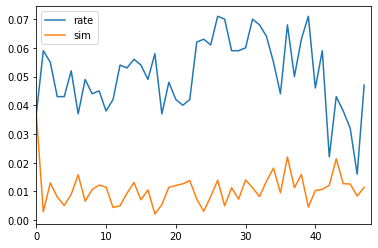

In [436]:
df_onr_a[["rate","sim"]].plot()

(-10, 10)

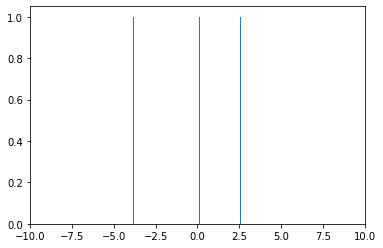

In [190]:

b = np.random.normal(
    loc   = 0,      # 平均
    scale = 3,    # 標準偏差
    size  = 3,# 出力配列のサイズ(タプルも可)
)

plt.hist(b,bins=100)
plt.xlim(-10,10)